In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

print("Tensorflow version : ", tf.__version__)

In [ ]:
# download data
path_to_train_file = tf.keras.utils.get_file(
    'train.txt',
    'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt'
)
path_to_test_file = tf.keras.utils.get_file(
    'test.txt',
    'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt'
)

In [ ]:
train_text = open(path_to_train_file, 'rb').read().decode(encoding = 'utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding = 'utf-8')

print('Length of train text : {} characters'.format(len(train_text)))
print('Length of text text : {} characters'.format(len(test_text)))
print(train_text[:47])

In [ ]:
train_Y = np.array([
    [int(row.split('\t')[2])]
    for row in train_text.split('\n')[1:]
    if row.count('\t') > 0
])

test_Y = np.array([
    [int(row.split('\t')[2])]
    for row in test_text.split('\n')[1:]
    if row.count('\t') > 0
])
print("train_Y shape:", train_Y.shape)
print("test_Y shape:", test_Y.shape)
print("train_Y sample:", train_Y[:5])

In [45]:
import re

def clean_str(string):
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()

train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]
sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(5):
    print(sentences[i])

<>:13: SyntaxWarning: invalid escape sequence '\('
<>:14: SyntaxWarning: invalid escape sequence '\)'
<>:15: SyntaxWarning: invalid escape sequence '\?'
<>:13: SyntaxWarning: invalid escape sequence '\('
<>:14: SyntaxWarning: invalid escape sequence '\)'
<>:15: SyntaxWarning: invalid escape sequence '\?'
/tmp/ipython-input-3999841918.py:13: SyntaxWarning: invalid escape sequence '\('
  string = re.sub(r"\(", " \( ", string)
/tmp/ipython-input-3999841918.py:14: SyntaxWarning: invalid escape sequence '\)'
  string = re.sub(r"\)", " \) ", string)
/tmp/ipython-input-3999841918.py:15: SyntaxWarning: invalid escape sequence '\?'
  string = re.sub(r"\?", " \? ", string)


['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


In [46]:
VOCAB_SIZE = 2000   # 단어 사전 크기
MAX_LEN = 25        # 문장 길이 최댓값

vectorize_layer = tf.keras.layers.TextVectorization(
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=MAX_LEN
)

vectorize_layer.adapt(train_text_X)
train_X = vectorize_layer(train_text_X)

print(train_X[:1])

tf.Tensor(
[[  23  902    5    1 1097    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]], shape=(1, 25), dtype=int64)


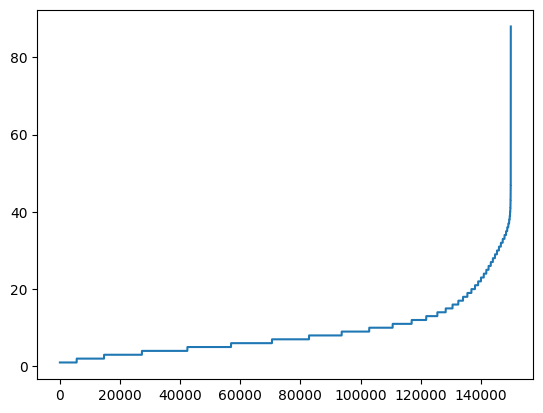

142587


In [47]:
import matplotlib.pyplot as plt
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l<=25) for l in sentence_len]))

In [48]:
test_text_X = [
    row.split('\t')[1]
    for row in test_text.split('\n')[1:]
    if row.count('\t') > 0
]

test_X = vectorize_layer(test_text_X)

print("test_X shape:", test_X.shape)
print("test_Y shape:", test_Y.shape)

test_X shape: (50000, 25)
test_Y shape: (50000, 1)


In [49]:
VOCAB_SIZE = 2000
EMBEDDING_DIM = 128
MAX_LEN = 25
EPOCHS = 10
BATCH_SIZE = 32

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
history = model.fit(
    train_X, train_Y,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6718 - loss: 0.5642 - val_accuracy: 0.7564 - val_loss: 0.4640
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7488 - loss: 0.4688 - val_accuracy: 0.7611 - val_loss: 0.4548
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7503 - loss: 0.4616 - val_accuracy: 0.7598 - val_loss: 0.4553
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7514 - loss: 0.4560 - val_accuracy: 0.7591 - val_loss: 0.4574
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7549 - loss: 0.4506 - val_accuracy: 0.7535 - val_loss: 0.4665
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7577 - loss: 0.4461 - val_accuracy: 0.7512 - val_loss: 0.4697
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7609 - loss: 0.4414 - val_accuracy: 0.7495 - val_loss: 0.4754
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7637 - loss: 0

In [53]:
test_loss, test_acc = model.evaluate(test_X, test_Y, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

Test Loss: 0.5045, Test Accuracy: 0.7329


In [54]:
example_sentences = [
    "이 영화 진짜 재미",
    "완전 지루하고 별로",
    "배우 연기는 좋았는데, 스토리가 아쉽"
]

example_seq = vectorize_layer(example_sentences)
pred = model.predict(example_seq)

for s, p in zip(example_sentences, pred):
    print(f"문장: {s}")
    print(f"긍정 확률: {p[0]:.4f}")
    print("결과:", "긍정 😊" if p[0] > 0.5 else "부정 😞")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
문장: 이 영화 진짜 재미
긍정 확률: 0.3036
결과: 부정 😞
문장: 완전 지루하고 별로
긍정 확률: 0.0019
결과: 부정 😞
문장: 배우 연기는 좋았는데, 스토리가 아쉽
긍정 확률: 0.0196
결과: 부정 😞


In [55]:
# 실습 미션 코드를 작성해주세요.
# 1. Epoch=30 으로 늘려 모델 학습
# 2. matplotlib를 이용하여 Epoch 10 과 Epoch 30을 비교하여 시각화
#history2 = model.fit(
#    train_X, train_Y,
#    epochs=30,
#    batch_size=BATCH_SIZE,
#    validation_split=0.2,
#    verbose=1
#)

Epoch 1/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7713 - loss: 0.4256 - val_accuracy: 0.7533 - val_loss: 0.4814
Epoch 2/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7730 - loss: 0.4226 - val_accuracy: 0.7541 - val_loss: 0.4829
Epoch 3/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7749 - loss: 0.4195 - val_accuracy: 0.7546 - val_loss: 0.4862
Epoch 4/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7768 - loss: 0.4166 - val_accuracy: 0.7549 - val_loss: 0.4915
Epoch 5/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7782 - loss: 0.4134 - val_accuracy: 0.7527 - val_loss: 0.4969
Epoch 6/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7805 - loss: 0.4098 - val_accuracy: 0.7524 - val_loss: 0.5001
Epoch 7/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7828 - loss: 0.4061 - val_accuracy: 0.7541 - val_loss: 0.5004
Epoch 8/30
1280/3750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7844 - loss: 0.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-3095225333.py", line 4, in <cell line: 0>
    history2 = model.fit(
               ^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py", line 377, in fit
    logs = self.train_function(iterator)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py", line 220, in function
    opt_outputs = multi_step_on_iterator(iterator)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in er

TypeError: object of type 'NoneType' has no len()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# X축 범위 및 눈금 설정을 위한 0부터 29까지의 인덱스 생성
epochs_30 = np.arange(0, len(history2.history['loss']))
# 사용자에게 보여줄 Epoch 레이블 (1부터 30까지)
epoch_labels = np.arange(1, 31, 5) # 1, 6, 11, ... 26
# X축 눈금 위치 (0, 5, 10, ... 25)
tick_positions = np.arange(0, 30, 5)

plt.figure(figsize=(16, 6)) # 전체 그림 크기를 더 키워서 가독성 향상

# ----------------------------------------------------------------------
# 1. 손실(Loss) 그래프 (왼쪽)
# ----------------------------------------------------------------------
plt.subplot(1, 2, 1) # 1행 2열 중 첫 번째 플롯

# 훈련 손실 데이터 Plot
plt.plot(np.arange(0, len(history.history['loss'])), history.history['loss'],
         label='Epoch 10 Train Loss', linestyle='--', color='blue', alpha=0.6)
plt.plot(epochs_30, history2.history['loss'],
         label='Epoch 30 Train Loss', linestyle='-', color='red')

# 검증 손실 데이터 Plot
plt.plot(np.arange(0, len(history.history['val_loss'])), history.history['val_loss'],
         label='Epoch 10 Validation Loss', linestyle=':', color='blue', alpha=0.6)
plt.plot(epochs_30, history2.history['val_loss'],
         label='Epoch 30 Validation Loss', linestyle='--', color='red')

# X축 설정 (30 Epoch까지 표시)
plt.xlim([0, 29])
plt.xticks(tick_positions, labels=epoch_labels)

plt.title('Model Loss Comparison', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True)

# ----------------------------------------------------------------------
# 2. 정확도(Accuracy) 그래프 (오른쪽)
# ----------------------------------------------------------------------
plt.subplot(1, 2, 2) # 1행 2열 중 두 번째 플롯

# 훈련 정확도 데이터 Plot
plt.plot(np.arange(0, len(history.history['accuracy'])), history.history['accuracy'],
         label='Epoch 10 Train Accuracy', linestyle='--', color='blue', alpha=0.6)
plt.plot(epochs_30, history2.history['accuracy'],
         label='Epoch 30 Train Accuracy', linestyle='-', color='red')

# 검증 정확도 데이터 Plot
plt.plot(np.arange(0, len(history.history['val_accuracy'])), history.history['val_accuracy'],
         label='Epoch 10 Validation Accuracy', linestyle=':', color='blue', alpha=0.6)
plt.plot(epochs_30, history2.history['val_accuracy'],
         label='Epoch 30 Validation Accuracy', linestyle='--', color='red')

# X축 설정 (30 Epoch까지 표시)
plt.xlim([0, 29])
plt.xticks(tick_positions, labels=epoch_labels)

plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right', fontsize=10) # 정확도는 값이 높으므로 범례 위치 조정
plt.grid(True)

plt.tight_layout() # 그래프 간격 자동 조정
plt.show()

In [56]:
from tensorflow.keras.layers import SimpleRNN
import random
EMBEDDING_DIM = 128
EPOCHS = 10
BATCH_SIZE = 32

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

rnn_model = tf.keras.Sequential([
    tf.keras.Input(shape=(MAX_LEN,)),
    tf.keras.layers.Embedding(
        input_dim=VOCAB_SIZE,
        output_dim=EMBEDDING_DIM,
        mask_zero=True
    ),
    SimpleRNN(units=50),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

rnn_model.summary()
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)        │ (None, 25, 128)        │       256,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         8,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 268,279 (1.02 MB)

 Trainable params: 268,279 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
history_rnn = rnn_model.fit(
    train_X, train_Y,
    epochs=EPOCHS,
    batch_size = BATCH_SIZE,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.7038 - loss: 0.5333 - val_accuracy: 0.7580 - val_loss: 0.4610
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.7607 - loss: 0.4535 - val_accuracy: 0.7550 - val_loss: 0.4687
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.7815 - loss: 0.4171 - val_accuracy: 0.7502 - val_loss: 0.4862
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7965 - loss: 0.3897 - val_accuracy: 0.7481 - val_loss: 0.5002
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8052 - loss: 0.3711 - val_accuracy: 0.7442 - val_loss: 0.5151
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8091 - loss: 0.3612 - val_accuracy: 0.7456 - val_loss: 0.5389
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8153 - loss: 0.3490 - val_accuracy: 0.7386 - val_loss: 0.5709
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8174 - loss: 0

In [58]:
test_loss, test_acc = rnn_model.evaluate(test_X, test_Y, verbose=0)

print(f"RNN Test Loss : {test_loss:.4f}, RNN Test Accuracy : {test_acc:.4f}")

RNN Test Loss : 0.6128, RNN Test Accuracy : 0.7140


In [59]:
example_sentence = [
    "배우 연기는 좋았지만 스토리가 아쉬웠다.",
    "스토리는 아쉬웠지만 배우 연구는 좋았다"
]

example_seq = vectorize_layer(example_sentences)
pred = rnn_model.predict(example_seq)

for s, p in zip(example_sentences, pred):
    print(f"문장: {s}")
    print(f"긍정 확률: {p[0]:.4f}")
    print("결과:,", "긍정 😊" if p[0] > 0.5 else "부정 😞")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
문장: 이 영화 진짜 재미
긍정 확률: 0.8783
결과:, 긍정 😊
문장: 완전 지루하고 별로
긍정 확률: 0.0000
결과:, 부정 😞
문장: 배우 연기는 좋았는데, 스토리가 아쉽
긍정 확률: 0.0753
결과:, 부정 😞


In [60]:
example_seq = vectorize_layer(example_sentences)
pred = model.predict(example_seq)

for s, p in zip(example_sentences, pred):
    print(f"문장: {s}")
    print(f"긍정 확률: {p[0]:.4f}")
    print("결과:", "긍정 😊" if p[0] > 0.5 else "부정 😞")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
문장: 이 영화 진짜 재미
긍정 확률: 0.5532
결과: 긍정 😊
문장: 완전 지루하고 별로
긍정 확률: 0.0047
결과: 부정 😞
문장: 배우 연기는 좋았는데, 스토리가 아쉽
긍정 확률: 0.1196
결과: 부정 😞


In [ ]:
# LSTM 모델 코드 실습

# [구현 요구사항]

# 1) 모델 변수명
#   - 반드시 lstm_model 이라는 이름으로 모델을 생성해주세요.

# 2) 순환 계층 변경
#   - SimpleRNN(units=50) → LSTM(units=50)

# [동일하게 유지되는 부분]

# - Input Layer             : shape=(MAX_LEN,)
# - Embedding Layer         : VOCAB_SIZE, EMBEDDING_DIM
# - Dense Layer 구조         : Dense(64, relu) + Dense(1, sigmoid)
# - 하이퍼파라미터              : 동일
# - random seed 설정         : 그대로 유지
# - compile 설정             : optimizer, loss, metrics 모두 동일
# - fit/evaluate 구조        : RNN과 동일한 방식으로 실행

# 최종적으로 lstm_model.evaluate(test_X, test_Y) 결과를 출력해주세요.

In [63]:
# 아래 두 문장을 lstm_model에 넣어 예측 결과(긍정 확률 + 최종 분류)를 출력해주세요.
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

lstm_model = tf.keras.Sequential([
    tf.keras.Input(shape=(MAX_LEN,)),
    tf.keras.layers.Embedding(
        input_dim=VOCAB_SIZE,
        output_dim=EMBEDDING_DIM,
        input_length=MAX_LEN
    ),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

lstm_model.summary()
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ (None, 25, 128)        │       256,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 50)             │        35,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 295,129 (1.13 MB)

 Trainable params: 295,129 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
history_lstm = lstm_model.fit(
    train_X, train_Y,
    epochs=EPOCHS,
    batch_size = BATCH_SIZE,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.6545 - loss: 0.5710 - val_accuracy: 0.7550 - val_loss: 0.4589
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7543 - loss: 0.4574 - val_accuracy: 0.7603 - val_loss: 0.4569
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7604 - loss: 0.4422 - val_accuracy: 0.7607 - val_loss: 0.4595
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7660 - loss: 0.4288 - val_accuracy: 0.7625 - val_loss: 0.4671
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7717 - loss: 0.4162 - val_accuracy: 0.7613 - val_loss: 0.4808
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7769 - loss: 0.4033 - val_accuracy: 0.7599 - val_loss: 0.4883
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7842 - loss: 0.3908 - val_accuracy: 0.7598 - val_loss: 0.4997
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7907 - loss: 0

In [65]:
example_sentences = [
  "이 영화는 정말 재미있고, 스토리도 흥미진진하며 배우들의 연기까지 완벽해서 끝까지 눈을 뗄 수 없었었요.",
  "영화가 전체적으로 너무 지루하고 전개가 느려서 몰입하기 힘들었으며, 기대했던 재미나 감동이 전혀 없었어요."
]

example_seq = vectorize_layer(example_sentences)
pred = lstm_model.predict(example_seq)

for s, p in zip(example_sentences, pred):
    print(f"문장: {s}")
    print(f"긍정 확률: {p[0]:.4f}")
    print("결과:", "긍정 😊" if p[0] > 0.5 else "부정 😞")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
문장: 이 영화는 정말 재미있고, 스토리도 흥미진진하며 배우들의 연기까지 완벽해서 끝까지 눈을 뗄 수 없었었요.
긍정 확률: 0.9980
결과: 긍정 😊
문장: 영화가 전체적으로 너무 지루하고 전개가 느려서 몰입하기 힘들었으며, 기대했던 재미나 감동이 전혀 없었어요.
긍정 확률: 0.0020
결과: 부정 😞


In [66]:
pred1 = rnn_model.predict(example_seq)

for s, p in zip(example_sentences, pred1):
    print(f"문장: {s}")
    print(f"긍정 확률: {p[0]:.4f}")
    print("결과:", "긍정 😊" if p[0] > 0.5 else "부정 😞")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
문장: 이 영화는 정말 재미있고, 스토리도 흥미진진하며 배우들의 연기까지 완벽해서 끝까지 눈을 뗄 수 없었었요.
긍정 확률: 0.9996
결과: 긍정 😊
문장: 영화가 전체적으로 너무 지루하고 전개가 느려서 몰입하기 힘들었으며, 기대했던 재미나 감동이 전혀 없었어요.
긍정 확률: 0.2139
결과: 부정 😞
